In [5]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os 
import dlib

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [6]:

model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=100,
    learning_rate=0.1,
    reg_lambda=0.1,
    reg_alpha=0.0,
)





In [68]:
faces = []
labels = []
people = os.listdir('./face/')
for person in people:
    pics = os.listdir('./face/'+person)
    for direction in pics:
        # print('./face/'+person+'/'+ direction)
        gray_image = cv2.imread('./face/'+person+'/'+ direction,cv2.COLOR_BGR2GRAY)
        gray_image = cv2.resize(gray_image,(100,100))
        gray_image = gray_image.flatten()
        faces.append(gray_image)
        labels.append(person)

In [69]:
X_train = faces
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(labels)



my_dict = {'hassan': 0, 'soheyl': 1}

print(y_train)
# Train the model
# print(X_train[0])


model.fit(X_train, y_train)

[0 0 0 0 1 1 1 1]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:
gray_image = cv2.imread('./front.jpg' ,cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image,(100,100))
gray_image = gray_image.flatten()






<Axes: >

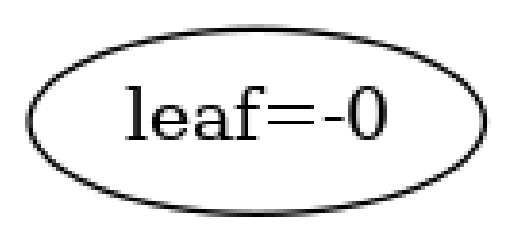

In [71]:
xgb.plot_tree(model, num_trees=2)

In [12]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 375.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [73]:
k = 4
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [74]:
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [75]:
y_pred = model.predict([gray_image])

In [76]:
accuracy = accuracy_score([1], y_pred)

In [77]:
accuracy

0.0

In [78]:
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, marker='o', edgecolor='k', s=50)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'k-NN Decision Boundaries (k={k})')
plt.show()

NameError: name 'xx' is not defined

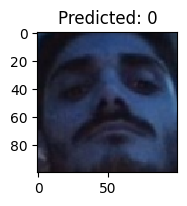

In [155]:
num_examples = 1
plt.figure(figsize=(12, 4))
for i in range(num_examples):
    plt.subplot(2, 1, i + 1)
    # Reshape the flattened image back to its original 2D form
    image = [gray][0].reshape(100, 100,3)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Predicted: {y_pred[0]}')
plt.show()

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [82]:
k_neighbors = 2  # You can adjust this value
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [83]:
y_pred = knn_classifier.predict([gray_image])


In [84]:
y_pred

array([0])

In [85]:
import dlib
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [86]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")  # Download this model


In [147]:
face_images = []
face_landmarks = []
face_labels = []
people = os.listdir('./face/')
for person in people:
    pics = os.listdir('./face/'+person)
    for direction in pics:
        print('./face/'+person+'/'+ direction)
        gray_image = cv2.imread('./face/'+person+'/'+ direction)
        faces = detector(gray_image)
        # face = faces[0]
        landmarks = predictor(gray_image, face)
        landmarks = np.array([[p.x, p.y] for p in landmarks.parts()])
        
        # Perform any necessary preprocessing like resizing, grayscale conversion, etc.
        # Example:
        gray = cv2.resize(gray_image, (100, 100))
        
        face_images.append(gray_image)
        face_landmarks.append(landmarks)
        face_labels.append(person)

./face/hassan/right.jpg
./face/hassan/left.jpg
./face/hassan/front.jpg
./face/hassan/up.jpg
./face/soheyl/right.jpg
./face/soheyl/left.jpg
./face/soheyl/front.jpg
./face/soheyl/up.jpg


In [148]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(face_labels)

In [149]:
X_train = np.array(face_landmarks).reshape(len(face_landmarks),-1)

In [150]:
X_train[0].flatten()

array([ 13,  45,  15,  58,  17,  70,  20,  82,  25,  93,  32, 103,  41,
       111,  51, 118,  63, 119,  77, 117,  90, 111, 101, 103, 110,  92,
       115,  79, 117,  65, 118,  50, 119,  34,  18,  32,  22,  24,  30,
        20,  40,  20,  49,  23,  62,  21,  71,  16,  82,  14,  93,  16,
       101,  24,  55,  35,  55,  44,  55,  53,  54,  62,  47,  70,  52,
        71,  57,  72,  62,  71,  68,  69,  28,  41,  33,  37,  39,  36,
        45,  40,  39,  42,  33,  43,  72,  37,  78,  33,  84,  32,  90,
        35,  85,  38,  78,  38,  44,  90,  48,  85,  54,  82,  58,  83,
        63,  82,  71,  83,  79,  87,  72,  92,  65,  95,  60,  96,  55,
        95,  49,  94,  47,  89,  54,  88,  59,  88,  64,  87,  76,  87,
        64,  88,  59,  89,  54,  88])

In [151]:
k_neighbors = 4  # You can adjust this value
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [156]:
new_image_path = "front.jpg"
new_image = cv2.imread(new_image_path)
gray = cv2.resize(gray,(100,100))
faces = detector(gray)

# Assuming there's only one face in the new image for simplicity
if len(faces) == 1:
    landmarks = predictor(gray, faces[0])
    landmarks = np.array([[p.x, p.y] for p in landmarks.parts()])
    
    # Make predictions on the new image
    predicted_label = knn_classifier.predict([landmarks.flatten()])[0]
    predicted_person = label_encoder.inverse_transform([predicted_label])[0]

    print(f"Predicted person: {predicted_person}")

Predicted person: hassan


In [160]:
cv2.imshow('',new_image)